<a href="https://colab.research.google.com/github/The-DigitalAcademy/TrendHunt-Application/blob/Model/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential  # Import the Sequential class
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
# Data directories
train_data_dir = '/content/drive/MyDrive/my data/train'
validation_data_dir = '/content/drive/MyDrive/my data/validation'
test_data_dir = '/content/drive/MyDrive/my data/test'

Preprocessing our data

In [7]:
BATCH_SIZE = 32
IMG_SHAPE = 150   # Adjust image size

In [8]:
train_image_validator = ImageDataGenerator(rescale=1./255) # Generator for our train data
validation_image_validator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

Apply rescaling and resize images

In [12]:
from sklearn.utils import shuffle
train_data_gen = train_image_validator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = train_data_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE,IMG_SHAPE), # (150,150)
                                                           class_mode = 'categorical')

Found 69 images belonging to 6 classes.


In [13]:
from sklearn.utils import shuffle
validation_data_gen = validation_image_validator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = validation_data_dir,
                                                           shuffle = False,
                                                           target_size = (IMG_SHAPE,IMG_SHAPE), # (150,150)
                                                           class_mode = 'categorical')

Found 70 images belonging to 6 classes.


Visualize train images

In [14]:
sample_tarining_images,_ = next(train_data_gen)

In [16]:
def PlotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

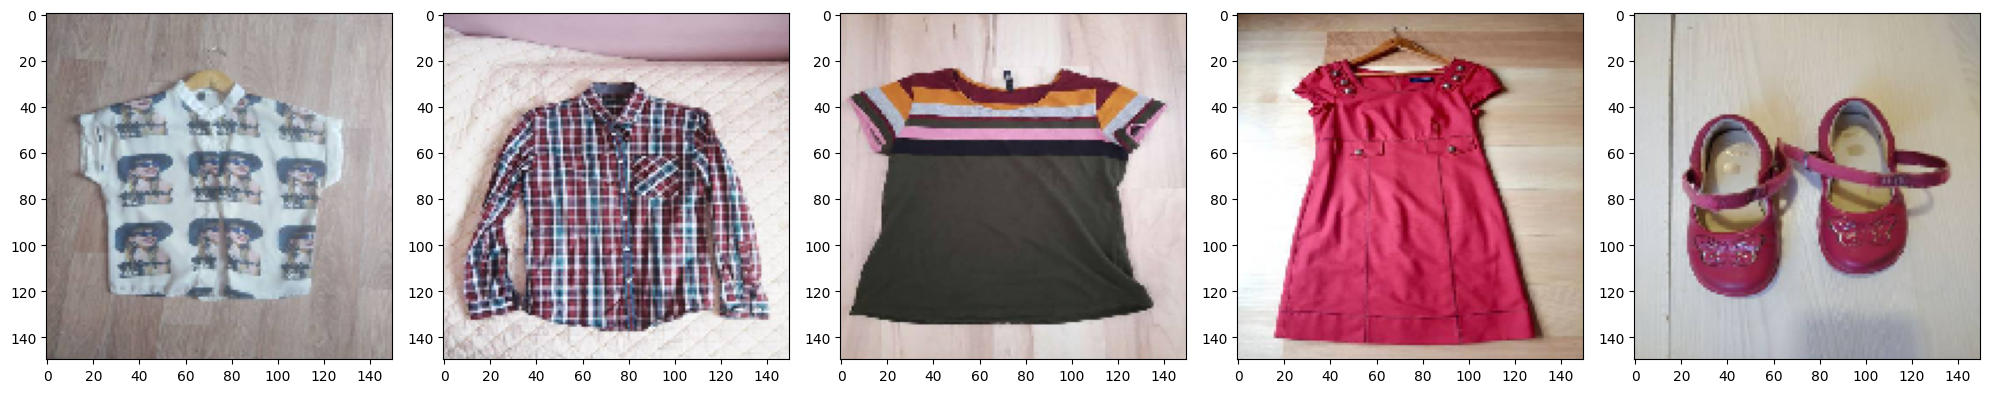

In [19]:
PlotImages(sample_tarining_images[:5])

Model creation

In [20]:
# Define the number of classes
num_classes = len(train_data_gen.class_indices)
num_classes

6

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

Compile the model

In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)      0

Train the model

In [ ]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy']
#               )

# EPOCHS = 5
# history = model.fit_generator(
#     train_data_gen,
#     stops_per_epochs = int(np.ceil(total_train/ float(BATCH_SIZE))),
#     epochs = EPOCHS,
#     validation_data = validation_data_gen,
#     validation_steps = int(np.ceil(total_val/ float(BATCH_SIZE))),
# )

In [34]:
# Train the model
epochs = 20
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples // BATCH_SIZE
)

Epoch 1/20
2/2 [==============================] - 20s 17s/step - loss: 2.2017 - accuracy: 0.2432 - val_loss: 2.8589 - val_accuracy: 0.1719
Epoch 2/20
2/2 [==============================] - 6s 2s/step - loss: 2.6834 - accuracy: 0.0811 - val_loss: 1.8209 - val_accuracy: 0.2344
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 1.8756 - accuracy: 0.1622 - val_loss: 1.7805 - val_accuracy: 0.2188
Epoch 4/20
2/2 [==============================] - 4s 3s/step - loss: 1.7658 - accuracy: 0.1892 - val_loss: 1.8784 - val_accuracy: 0.1562
Epoch 5/20
2/2 [==============================] - 6s 3s/step - loss: 1.7829 - accuracy: 0.3125 - val_loss: 1.7654 - val_accuracy: 0.2500
Epoch 6/20
2/2 [==============================] - 5s 3s/step - loss: 1.6343 - accuracy: 0.3594 - val_loss: 1.7244 - val_accuracy: 0.2969
Epoch 7/20
2/2 [==============================] - 5s 5s/step - loss: 1.3801 - accuracy: 0.5676 - val_loss: 1.7238 - val_accuracy: 0.2500
Epoch 8/20
2/2 [=======================

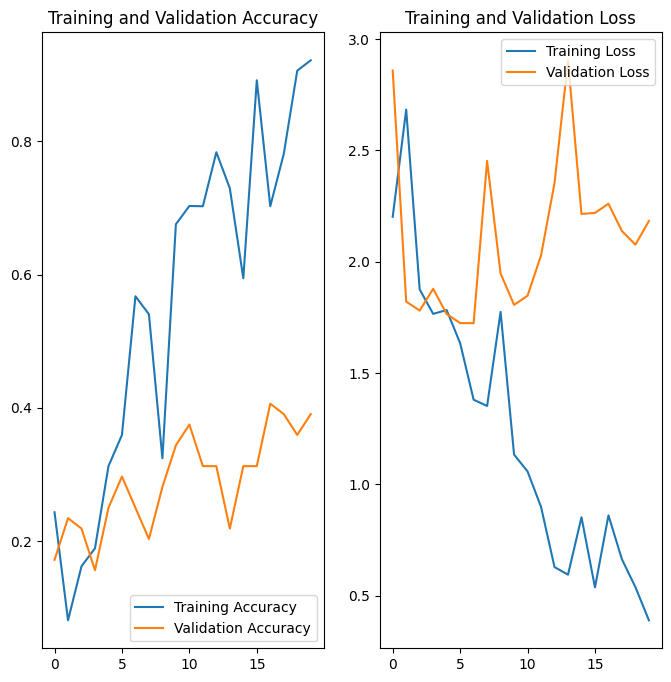

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()